### Metric Comparison

#### 0. Dependencies

In [1]:
from utils import plot_graph
import numpy as np
import matplotlib.pyplot as plt

#### 0.1. Values

In [2]:
CXr = [np.float64(0.9846166549391845), 0.9513236549957301, np.float64(0.9827160493827161), np.float64(0.9487485101311085), np.float64(0.9654335961188599), np.float64(0.6021684143228725), 0.57766408186106, np.float64(0.5606546854942234), np.float64(0.5785726113594966), np.float64(0.5694727406079374), np.float64(0.7246279280943148), 0.6727163038560153, np.float64(0.6420110064359668), np.float64(0.720355834641549), np.float64(0.6789307555730913)]
CheX = [np.float64(0.5861394594656927), 0.6301229508196722, np.float64(0.7790728476821192), np.float64(0.6882752164755441), np.float64(0.7308648111332008), np.float64(0.7398192114241497), 0.6922462030375699, np.float64(0.7089201877934272), np.float64(0.6213991769547325), np.float64(0.6622807017543859), np.float64(0.7394329391675698), 0.6828213765019355, np.float64(0.663873182552504), np.float64(0.6881214024071167), np.float64(0.6757798448018911)]
RSNA = [np.float64(0.8663029653797316), 0.7906420765027322, np.float64(0.9085545722713865), np.float64(0.7928855604961386), np.float64(0.846788302924269), np.float64(0.652247012143888), 0.615716683987529, np.float64(0.5970078740157481), np.float64(0.6277529392283491), np.float64(0.6119945112599887), np.float64(0.8513934895862976), 0.7719959778783309, np.float64(0.7625127681307456), np.float64(0.7715762273901808), np.float64(0.7670177241202157)]

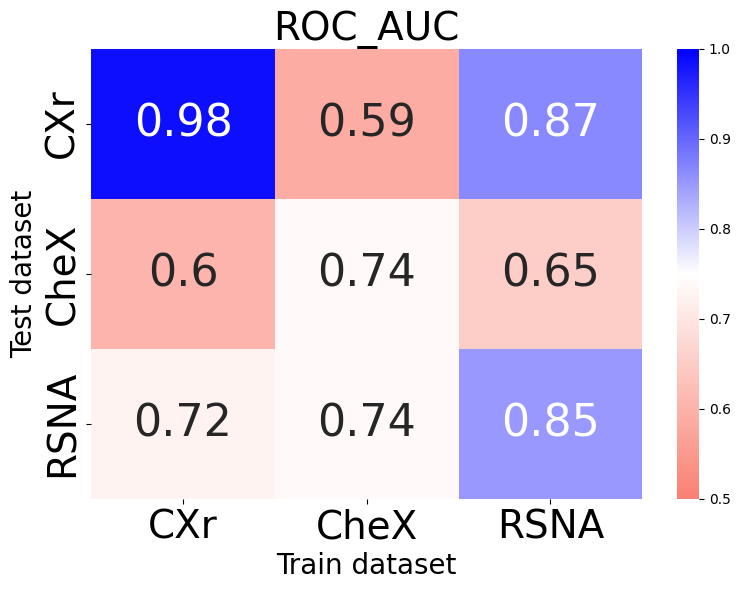

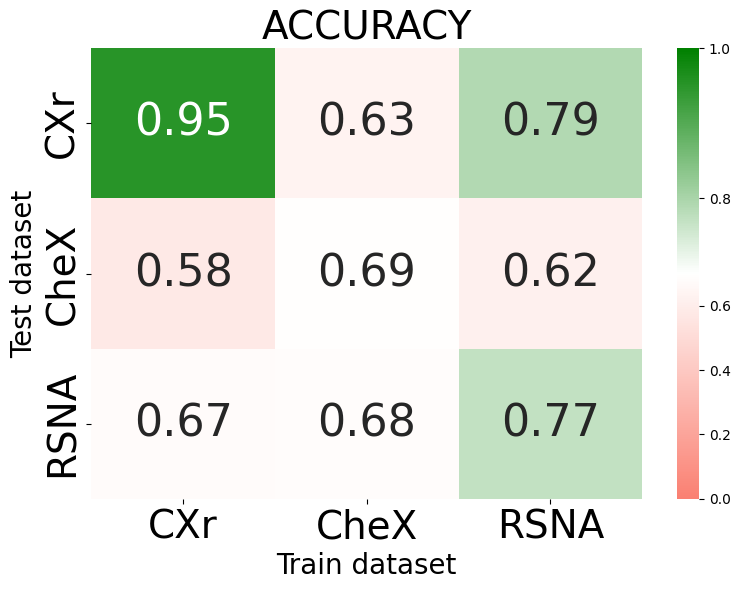

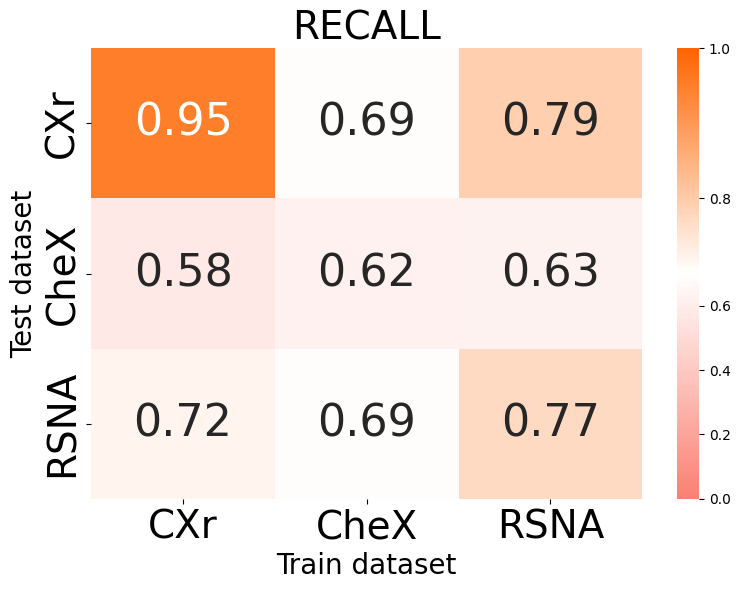

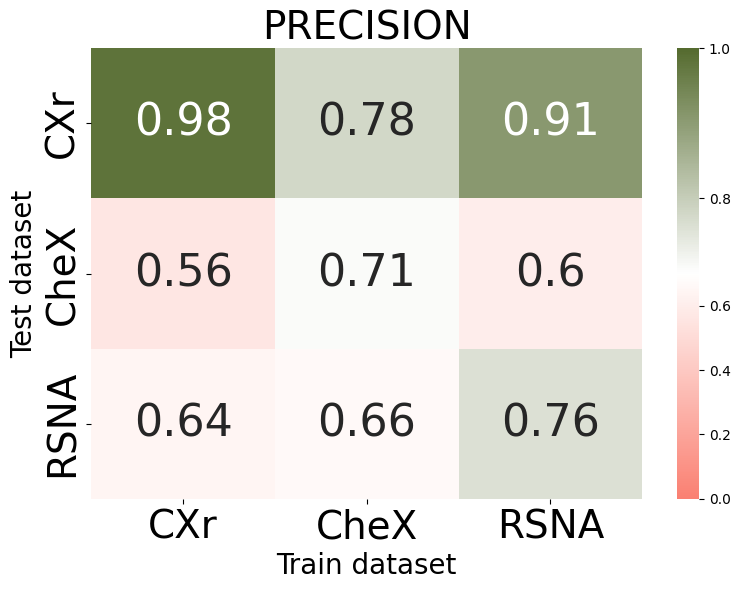

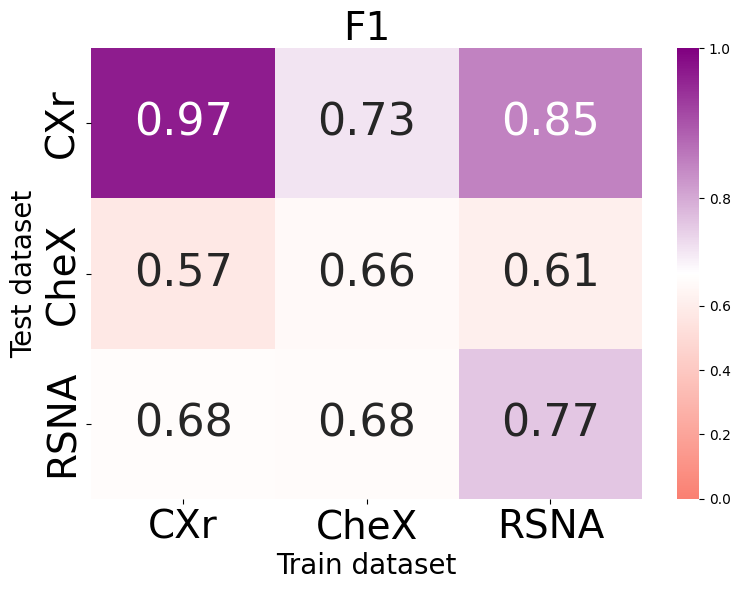

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm

# Define unique colormaps for each metric
blue = LinearSegmentedColormap.from_list("a", ["salmon", "#ffffff", "#0000ff"])
green = LinearSegmentedColormap.from_list("b", ["salmon", "#ffffff", "#008000"])
green_2 = LinearSegmentedColormap.from_list("c", ["salmon", "#ffffff", "#556b2f"])
orange = LinearSegmentedColormap.from_list("d", ["salmon", "#ffffff", "#ff6500"])
purple = LinearSegmentedColormap.from_list("e", ["salmon", "#ffffff", "#800080"])

metric_colormaps = {
    "roc_auc": blue,
    "f1": purple,
    "precision": green_2,
    "recall": orange,
    "accuracy": green
}

# Define your metrics and data as numpy arrays
metrics_data = {
    "roc_auc": np.array([[CXr[0], CXr[5], CXr[10]],
                         [CheX[0], CheX[5], CheX[10]],
                         [RSNA[0], RSNA[5], RSNA[10]]]),
    "accuracy": np.array([[CXr[1], CXr[6], CXr[11]],
                          [CheX[1], CheX[6], CheX[11]],
                          [RSNA[1], RSNA[6], RSNA[11]]]),
    "recall": np.array([[CXr[3], CXr[8], CXr[13]],
                        [CheX[3], CheX[8], CheX[13]],
                        [RSNA[3], RSNA[8], RSNA[13]]]),
    "precision": np.array([[CXr[2], CXr[7], CXr[12]],
                           [CheX[2], CheX[7], CheX[12]],
                           [RSNA[2], RSNA[7], RSNA[12]]]),
    "f1": np.array([[CXr[4], CXr[9], CXr[14]],
                    [CheX[4], CheX[9], CheX[14]],
                    [RSNA[4], RSNA[9], RSNA[14]]])
}


def plot_model_heatmaps_with_colors(dataset_names, metrics_data, metric_colormaps={}):
    metrics = list(metrics_data.keys())

    for metric_name in metrics:
        metric_scores = metrics_data[metric_name].transpose()

        # Set vmin and center based on the metric
        if metric_name == 'roc_auc':
            vcenter = 0.75
            vmin = 0.5
        else:
            vcenter = 0.7
            vmin = 0

        divnorm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=1)

        plt.figure(figsize=(8, 6))
        sns.heatmap(
            metric_scores,
            annot=True,
            xticklabels=dataset_names,
            yticklabels=dataset_names,
            cmap=metric_colormaps.get(metric_name, 'coolwarm'),  # Use a default colormap if not specified
            cbar_kws={'label': ""},
            norm=divnorm,
            annot_kws={"size": 32},  # Increase annotation text size
        )
        plt.title(f"{metric_name.upper()}", fontsize=28)  # Increase title font size
        plt.xlabel("Train dataset", fontsize=20)  # Increase x-axis label font size
        plt.ylabel("Test dataset", fontsize=20)  # Increase y-axis label font size
        plt.xticks(fontsize=28)  # Increase x-axis ticks font size
        plt.yticks(fontsize=28)  # Increase y-axis ticks font size
        plt.tight_layout()
        plt.show()


# Dataset names
dataset_names = ["CXr", "CheX", "RSNA"]

# Generate heatmaps
plot_model_heatmaps_with_colors(dataset_names, metrics_data, metric_colormaps)

#### 1. AUROC

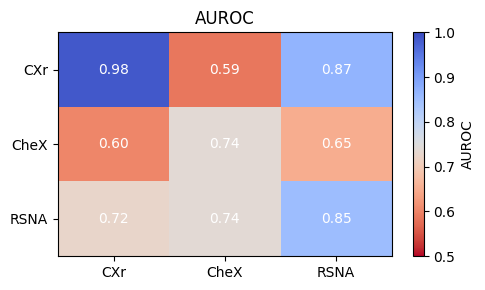

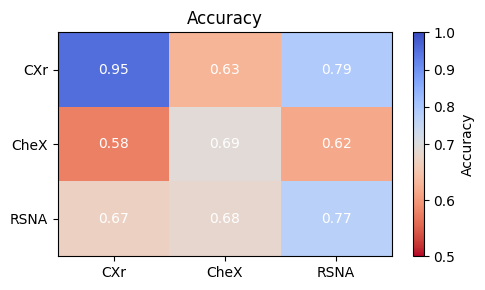

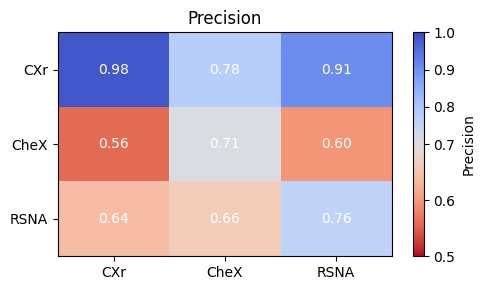

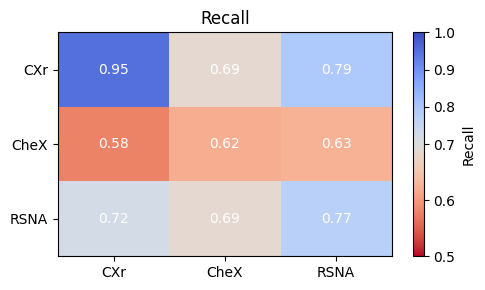

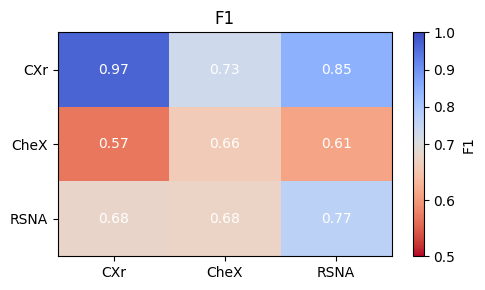

In [4]:
auroc = np.array([[CXr[0], CheX[0], RSNA[0]],
        [CXr[5], CheX[5], RSNA[5]],
        [CXr[10], CheX[10], RSNA[10]]])
accuracy = np.array([[CXr[1], CheX[1], RSNA[1]],
        [CXr[6], CheX[6], RSNA[6]],
        [CXr[11], CheX[11], RSNA[11]]])
precision = np.array([[CXr[2], CheX[2], RSNA[2]],
        [CXr[7], CheX[7], RSNA[7]],
        [CXr[12], CheX[12], RSNA[12]]])
recall = np.array([[CXr[3], CheX[3], RSNA[3]],
        [CXr[8], CheX[8], RSNA[8]],
        [CXr[13], CheX[13], RSNA[13]]])
f1 = np.array([[CXr[4], CheX[4], RSNA[4]],
        [CXr[9], CheX[9], RSNA[9]],
        [CXr[14], CheX[14], RSNA[14]]])
plot_graph("AUROC", auroc, 0.75)
plot_graph("Accuracy", accuracy, 0.7)
plot_graph("Precision", precision, 0.7)
plot_graph("Recall", recall, 0.7)
plot_graph("F1", f1, 0.7)


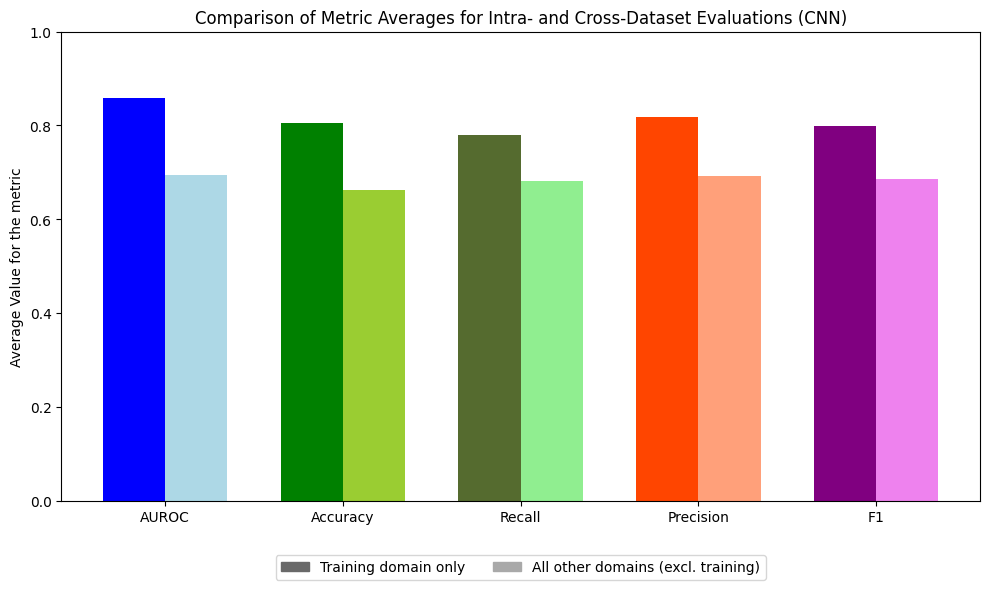

In [5]:
aurco = np.array(auroc)
accuracy = np.array(accuracy)
precision = np.array(precision)
recall = np.array(recall)
f1 = np.array(f1)

# Funzione per calcolare le medie
def calculate_means(metric_data):
    same_dataset = np.diagonal(metric_data)
    different_dataset = metric_data[~np.eye(metric_data.shape[0], dtype=bool)]
    return np.mean(same_dataset), np.mean(different_dataset)

# Calcolo delle medie per ogni metrica
metrics = ["AUROC", "Accuracy", "Recall", "Precision", "F1"]
values_same = []
values_different = []

for metric_data in [auroc, accuracy, recall, precision, f1]:
    mean_same, mean_different = calculate_means(metric_data)
    values_same.append(mean_same)
    values_different.append(mean_different)

# Colori distinti per ogni metrica
colors_same = ['blue', 'green', 'darkolivegreen', 'orangered', 'purple']
colors_different = ['lightblue', 'yellowgreen', 'lightgreen', 'lightsalmon', 'violet']

# Plottaggio
x = np.arange(len(metrics))  # Posizioni sulle x per le metriche
width = 0.35  # Larghezza delle barre

fig, ax = plt.subplots(figsize=(10, 6))

# Disegna le barre
for i in range(len(metrics)):
    ax.bar(x[i] - width/2, values_same[i], width, color=colors_same[i], label="Stesso Dataset" if i == 0 else None)
    ax.bar(x[i] + width/2, values_different[i], width, color=colors_different[i], label="Dataset Diversi" if i == 0 else None)

# Configurazioni del grafico
#ax.set_xlabel("")
ax.set_ylabel("Average Value for the metric")
ax.set_title("Comparison of Metric Averages for Intra- and Cross-Dataset Evaluations (CNN)")
ax.set_xticks(x)
ax.set_xticklabels(metrics)

# Aggiungi legenda con label personalizzate in grigio
legend_labels = ["Training domain only", "All other domains (excl. training)"]
legend_colors = ['dimgrey', 'darkgrey']
custom_handles = [plt.Rectangle((0, 0), 1, 1, color=legend_colors[i]) for i in range(len(legend_labels))]
ax.legend(custom_handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Mostra il grafico
plt.ylim(0, 1)  # Adatta in base all'intervallo delle metriche
plt.tight_layout()
plt.show()